# 인터넷 네이버 검색 결과 블로그 제목 10페이지 가져오기

####    
####   

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
#### selenium과 

## 1. 네이버 홈페이지 접근 및 검색어 입력

#### Selenium을 이용해 네이버에 접근

In [2]:
from selenium import webdriver


web_crawling = webdriver.Chrome("./chromedriver")

web_crawling.get('https://www.naver.com/')

#### 검색어 입력에 대한 해당하는 곳을 찾는다 .(find_element_by_name)
#### 찾은 후 미리 정의해 놓은 'search_word' 변수를 이용해 검색어를 입력한다.

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_name('query').send_keys(search_word)

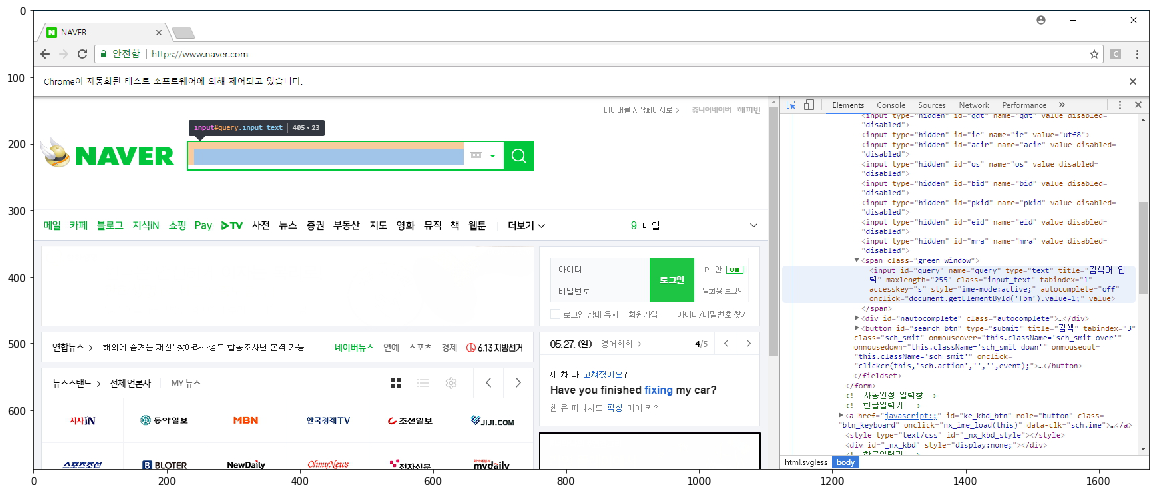

In [5]:
img = imread('search1.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

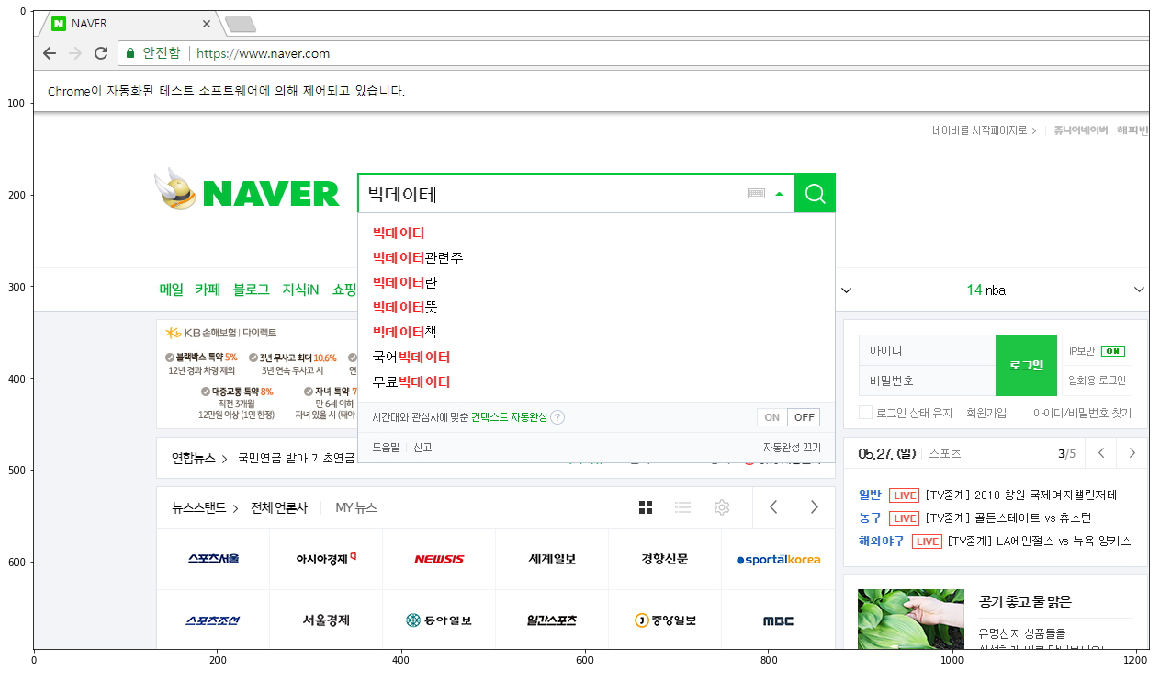

In [12]:
img = imread('search3.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

#### 검색어 버튼에 해당하는 부분을 찾느다.(find_element_by_css_selector)
#### 검색버튼을 누른다.(submit)

In [4]:
auto_search = web_crawling.find_element_by_id('search_btn')
auto_search.submit()

#### '블로그' 탭 누르기

In [ ]:
request 함수 사용

In [10]:
html = web_crawling.page_source 

In [13]:
soup = BeautifulSoup(html, 'html.parser')  

In [ ]:
blog_titles = soup.select('.sh_blog_title')

In [16]:
for n in blog_titles:            
    print(n.text)

[원페이지북] 빅데이터 부동산 투자(1분독서 **-***)  블로그 1-10 / 338,988건       1장의 이미지 더보기    [원페이지북] 빅데이터 부동산 투자(1분독서 **-***) 11시간 전  빅데이터 부동산 투자 작가 김기원 출판 다산북스 발매 2018.02.01. 평점 리뷰보기... 주관적인 경험과 의견이 아닌 객관적인 통계와 빅데이터로 말이다. 부동산에도...   Change or Die blog.naver.com/hl4gnn/221294713071 블로그 내 검색         2장의 이미지 더보기    아마존의 본질은 빅데이터 기업! 어제  아마존은 빅데이터라는 말이 요즘처럼 보급되기 훨씬 이전부터 전자상거래... 등 빅데이터를 철저하게 활용해왔다. “아마존에서는 데이터가 모든 것을 지배한다Data...   세상을 이해하는 또 하나의... 공식 blog.naver.com/banni...         9장의 이미지 더보기    빅데이터부동산투자 - 데이터로 바라보는 부동산 시장 2018.06.01.  빅데이터부동산투자 빅데이터 부동산투자는 데이터를 가지고 부동산 투자를 하라는 이야기를 담은 책입니다. 그래서 다양한 데이터들이 가득 담겨있습니다. 이...   돈이 그대 삶을 춤추... blog.naver.com/the_capitalist/2212868357... 블로그 내 검색         3장의 이미지 더보기    스포츠와 손잡은 인공지능과 빅데이터 2018.03.07.  인공지능 , 빅데이터 등의 Digital Transformation 의 기술들은 우리 생활 곳곳에... 출처 : KinaTrax 야구 빅데이터 넘어 인공지능 시대로 도래하다 108 년 만에 메이져리그...   SK(주) C&C 블로그 skccblog.tistory.com/3636 블로그 내 검색           기존보다 1000배 빠른 빅데이터 분석 기술 선봬 2018.05.29.  빠른 빅데이터 분석 기술을 개발했다. DGIST(대구경북과학기술원·총장 손상혁)는 

#### 검색 결과를 살핀다

In [ ]:
html = web_crawling.page_source 
soup = BeautifulSoup(html, 'html.parser')  
blog_titles = soup.select(' >  >')